In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Dance']
df = dfg[dfg['genre'] == 'Dance']

In [3]:
df.describe()

Unnamed: 0   popularity  acousticness  danceability    duration_ms  \
count    8701.000000  8701.000000   8701.000000   8701.000000    8701.000000   
mean    17409.495345    57.275256      0.152888      0.638191  226264.941846   
std     33816.635312    11.208370      0.184252      0.126575   47791.534876   
min       642.000000     0.000000      0.000004      0.163000   30891.000000   
25%      4554.000000    51.000000      0.018500      0.558000  196307.000000   
50%      6729.000000    57.000000      0.076000      0.648000  219053.000000   
75%     16950.000000    64.000000      0.225000      0.725000  247246.000000   
max    186298.000000   100.000000      0.996000      0.973000  678013.000000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  8701.000000       8701.000000  8701.000000  8701.000000  8701.000000   
mean      0.698067          0.035449     0.187753    -6.054241     0.083608   
std       0.160860          0.143123     0.148386     2.334848     0.077924   
min       0.025900          0.000000     0.014900   -30.016000     0.022800   
25%       0.585000          0.000000     0.092000    -7.191000     0.037400   
50%       0.712000          0.000001     0.129000    -5.689000     0.052700   
75%       0.828000          0.000221     0.246000    -4.487000     0.092200   
max       0.999000          0.979000     0.988000     1.342000     0.869000   

       ...  duration_ms_zscore  energy_zscore  instrumentalness_zscore  \
count  ...         8701.000000    8701.000000              8701.000000   
mean   ...           -0.088656       0.449388                -0.348307   
std    ...            0.409600       0.617326                 0.489399   
min    ...           -1.763121      -2.130153                -0.469522   
25%    ...           -0.345413       0.015478                -0.469522   
50%    ...           -0.150467       0.502859                -0.469517   
75%    ...            0.091163       0.948027                -0.468766   
max    ...            3.783079       1.604265                 2.878106   

       liveness_zscore  loudness_zscore  speechiness_zscore  tempo_zscore  \
count      8701.000000      8701.000000         8701.000000   8701.000000   
mean         -0.136488         0.555534           -0.208489      0.109821   
std           0.753316         0.393007            0.418352      0.849575   
min          -1.014019        -3.477766           -0.534953     -2.372009   
25%          -0.622603         0.364192           -0.456570     -0.535649   
50%          -0.434763         0.617012           -0.374428      0.085175   
75%           0.159215         0.819336           -0.162363      0.540724   
max           3.926155         1.800487            4.008067      3.277437   

       valence_zscore  lognorm_duration_zscore  Count_zscore  
count     8701.000000              8701.000000   8701.000000  
mean         0.285671                 0.024844     -0.236806  
std          0.888116                 0.526365      0.364672  
min         -1.608456                -5.110403     -0.617885  
25%         -0.406405                -0.291602     -0.483675  
50%          0.259225                -0.005911     -0.349465  
75%          0.979673                 0.309581     -0.086638  
max          2.119077                 2.938331      1.568618  

[8 rows x 27 columns]

In [6]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']

#
print(df.corr())
#print(pop.corr())
#print(nonpop.corr())

                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000    0.291011      0.043528      0.039415   
popularity                 0.291011    1.000000      0.053393      0.058618   
acousticness               0.043528    0.053393      1.000000     -0.041185   
danceability               0.039415    0.058618     -0.041185      1.000000   
duration_ms               -0.042429   -0.084997      0.006745     -0.094649   
energy                    -0.040361   -0.038883     -0.487356     -0.039948   
instrumentalness          -0.024147   -0.090311     -0.014954     -0.048978   
liveness                  -0.022052   -0.061152     -0.072369     -0.091134   
loudness                   0.014342    0.054629     -0.319915     -0.001368   
speechiness                0.013812    0.010200      0.012389      0.038390   
tempo                     -0.018030   -0.023153     -0.081433     -0.209033   
valence                   -0.004484    0.020531     

AxesSubplot(0.125,0.125;0.62x0.755)


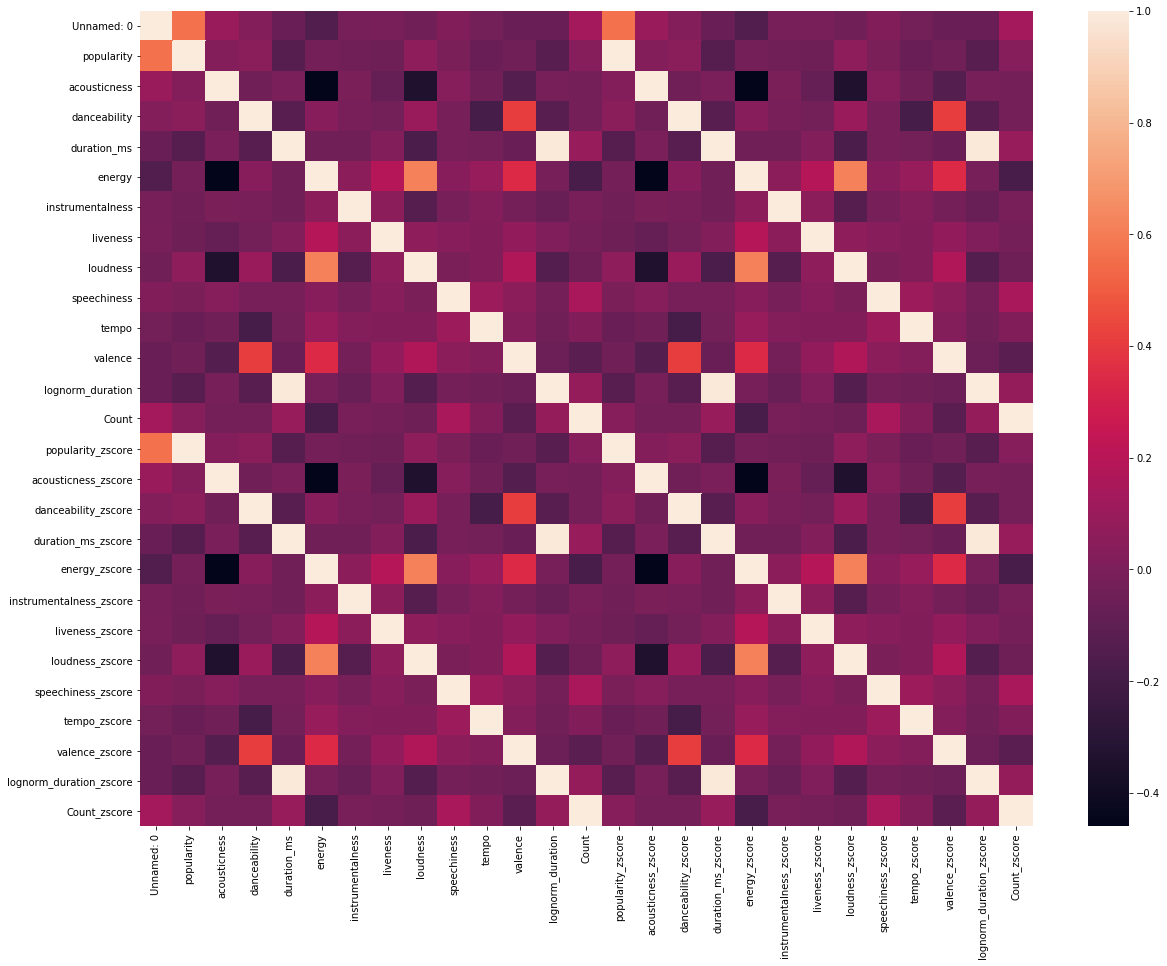

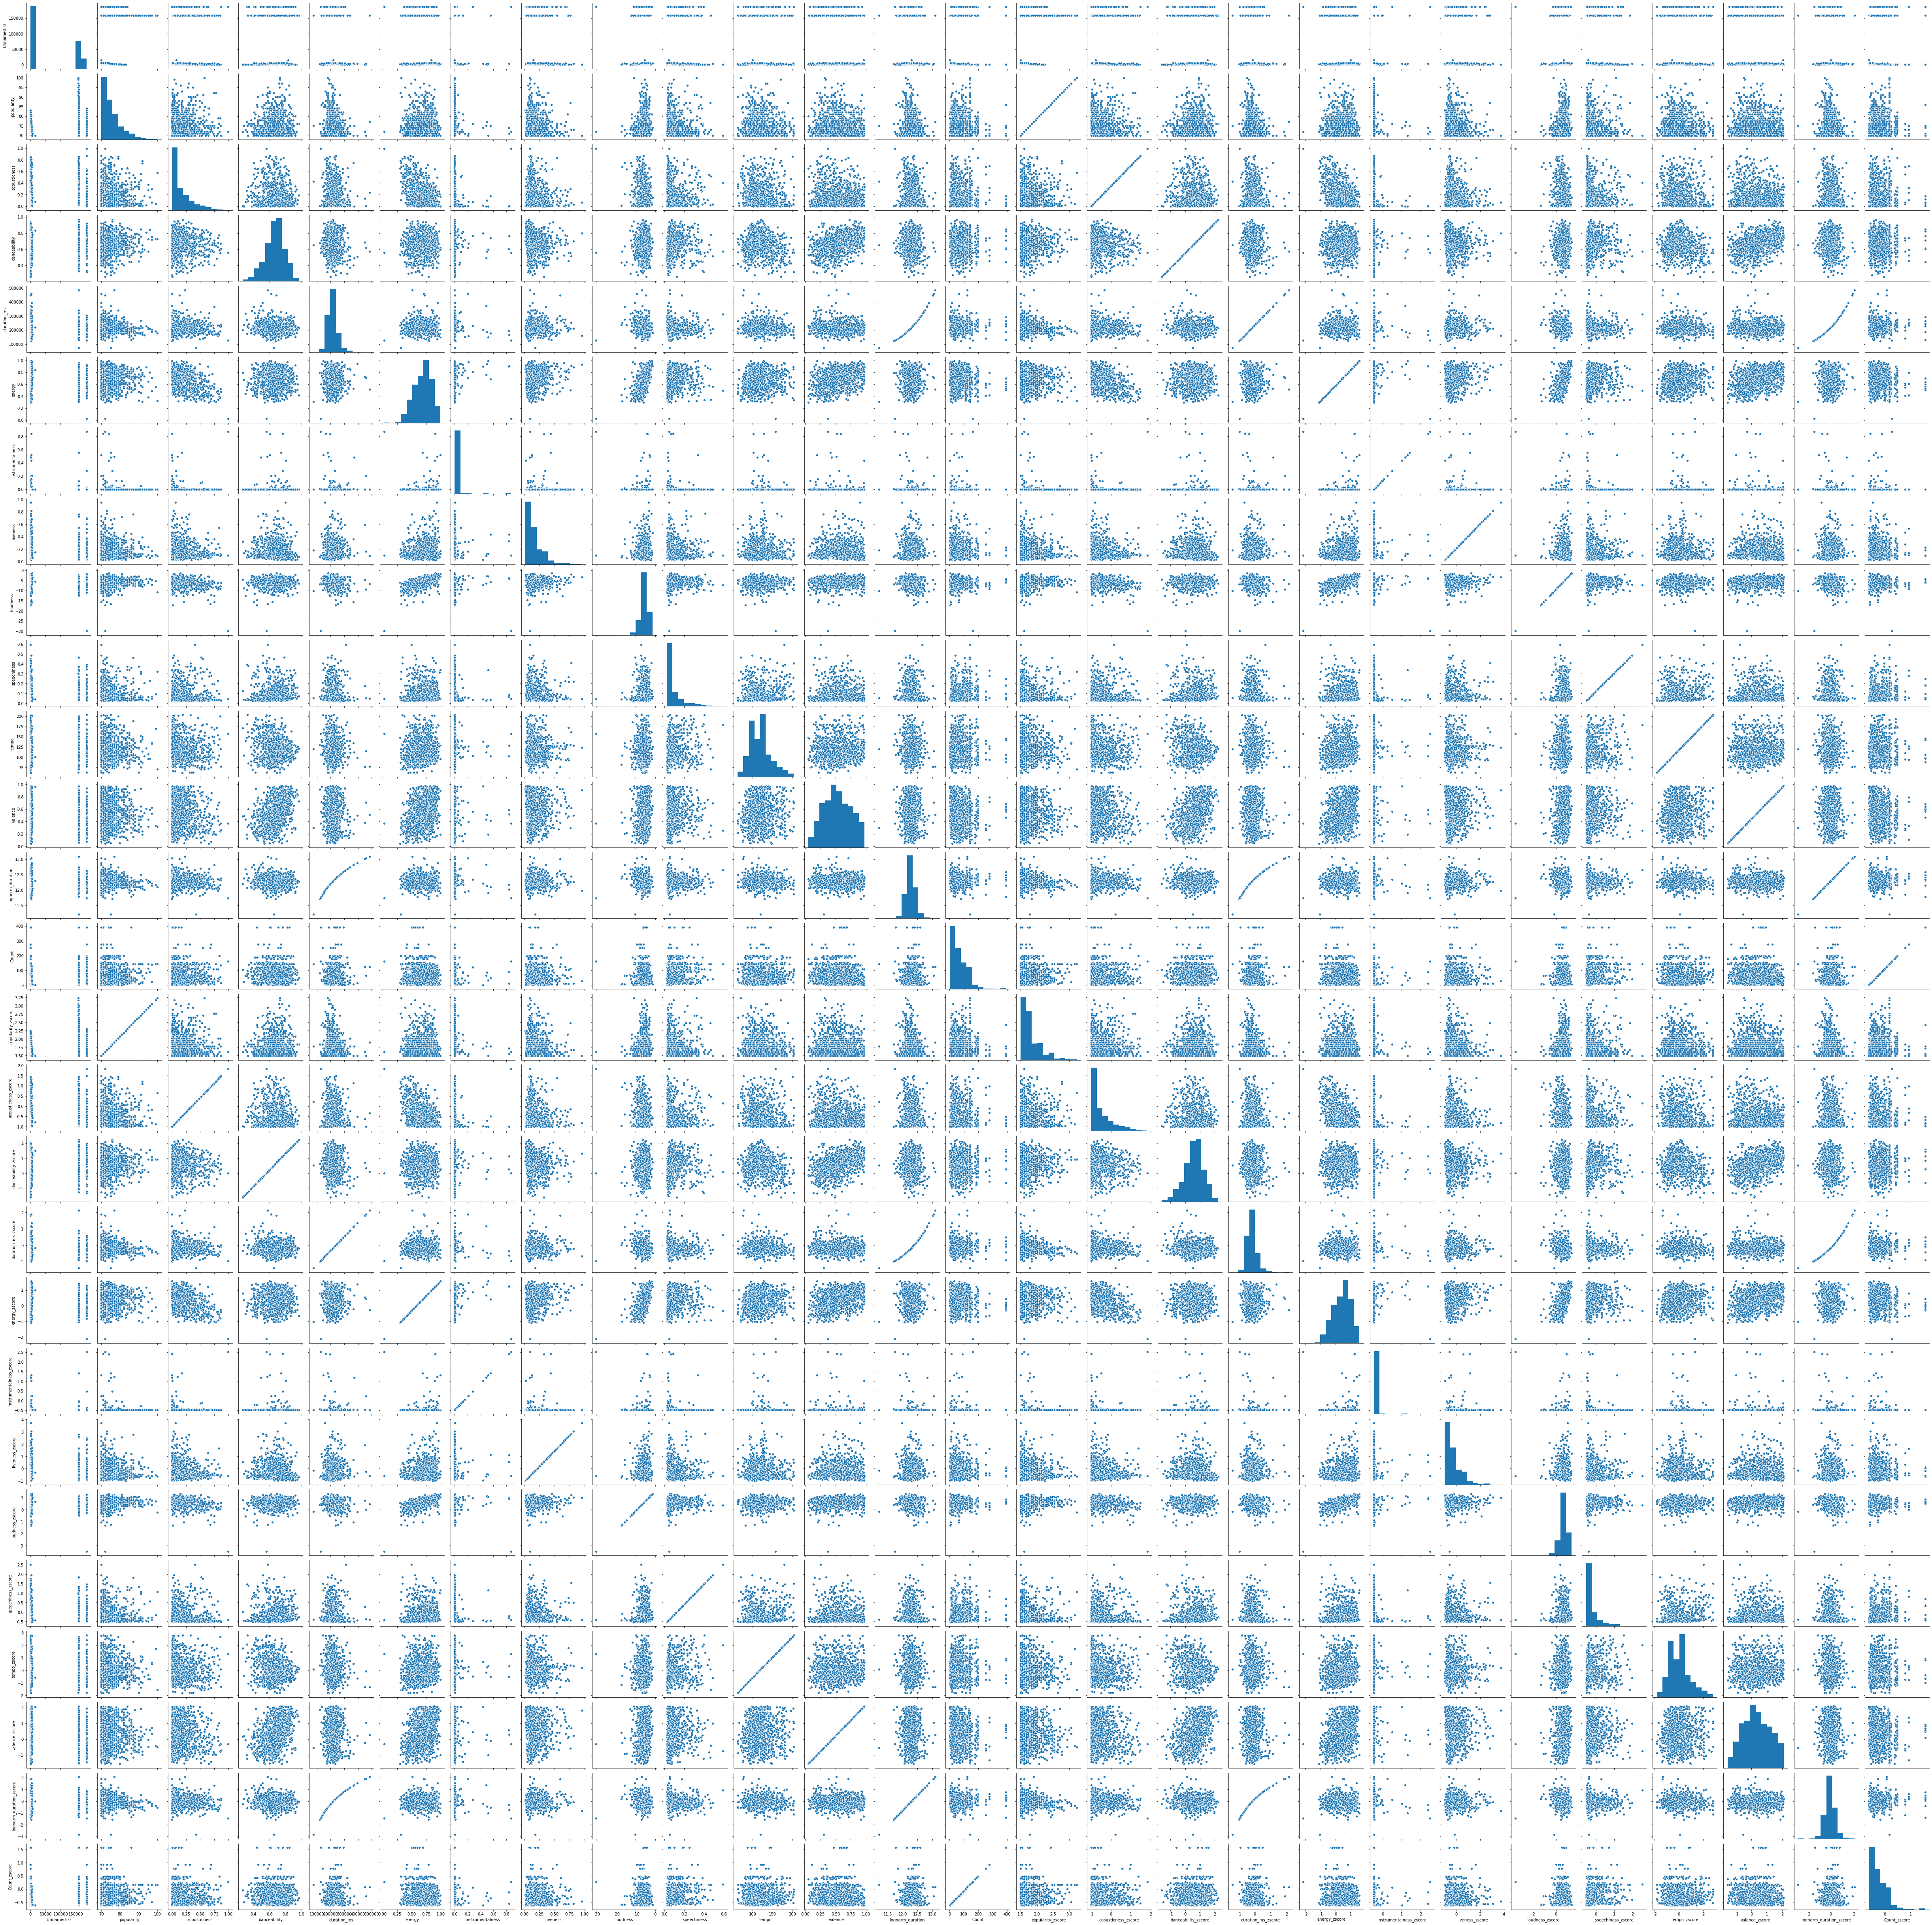

In [5]:
plt.subplots(figsize=(20,15))

m = sns.heatmap(pop.corr())
print(m)
n = sns.pairplot(data=pop)
print(n)


Let's look at instrumentalness, duration_ms, danceability, and liveness.

<ErrorbarContainer object of 3 artists>

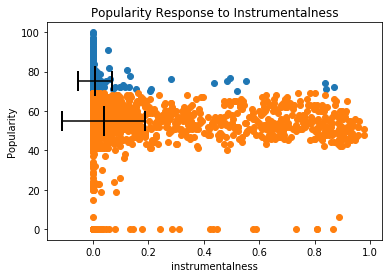

In [12]:
plt.scatter(pop.instrumentalness, pop.popularity)
plt.scatter(nonpop.instrumentalness, nonpop.popularity)
plt.xlabel("instrumentalness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Instrumentalness")

plt.errorbar(np.mean(pop.instrumentalness),np.mean(pop.popularity),xerr=np.std(pop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.instrumentalness),np.mean(nonpop.popularity),xerr=np.std(nonpop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

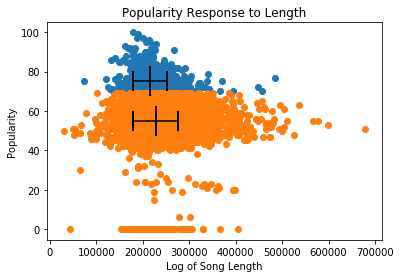

In [8]:
plt.scatter(pop.duration_ms, pop.popularity)
plt.scatter(nonpop.duration_ms, nonpop.popularity)
plt.xlabel("Log of Song Length")
plt.ylabel("Popularity")
plt.title("Popularity Response to Length")

plt.errorbar(np.mean(pop.duration_ms),np.mean(pop.popularity),xerr=np.std(pop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.duration_ms),np.mean(nonpop.popularity),xerr=np.std(nonpop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

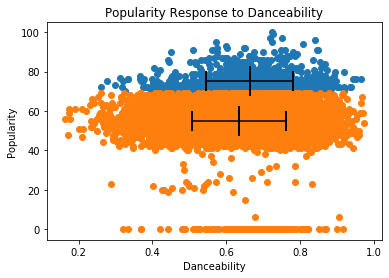

In [10]:
plt.scatter(pop.danceability, pop.popularity)
plt.scatter(nonpop.danceability, nonpop.popularity)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Popularity Response to Danceability")

plt.errorbar(np.mean(pop.danceability),np.mean(pop.popularity),xerr=np.std(pop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.danceability),np.mean(nonpop.popularity),xerr=np.std(nonpop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

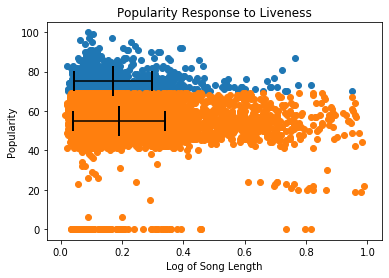

In [11]:
plt.scatter(pop.liveness, pop.popularity)
plt.scatter(nonpop.liveness, nonpop.popularity)
plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Liveness")

plt.errorbar(np.mean(pop.liveness),np.mean(pop.popularity),xerr=np.std(pop.liveness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.liveness),np.mean(nonpop.popularity),xerr=np.std(nonpop.liveness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

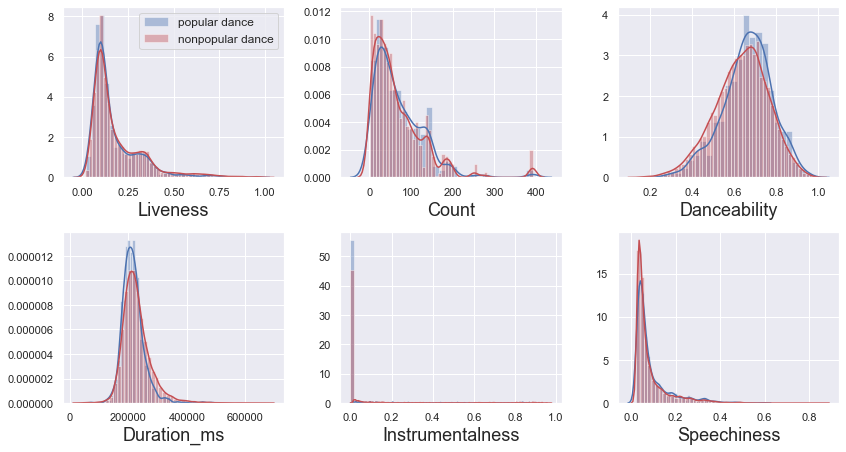

In [15]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Dance')
sns.distplot(nonpop.liveness, color='r', label='Unpopular Dance')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(nonpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


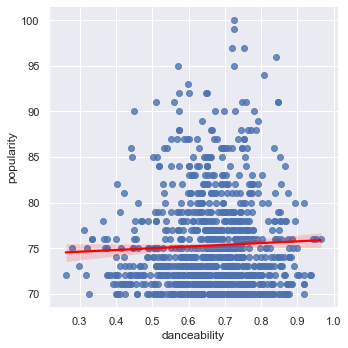

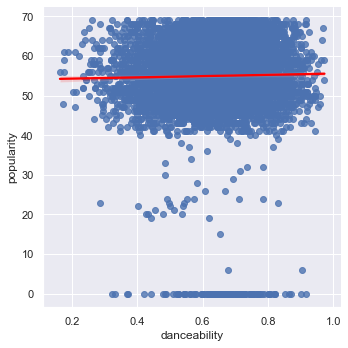

In [16]:
n = sns.lmplot(x='danceability',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)


It seems like for popular songs there is a positive corrletion betwen danceability that does not exist for unpopular songs. Let's take another view of how these features vary between popular and non-popular songs.

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


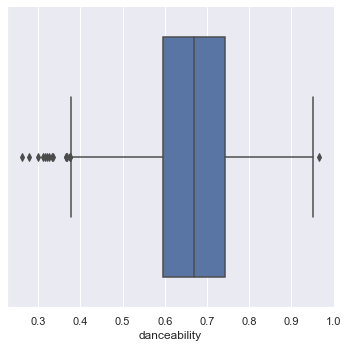

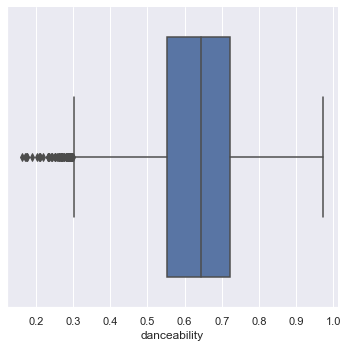

In [17]:
sns.factorplot(x='danceability', data=pop, kind='box')
sns.factorplot(x='danceability', data=nonpop, kind='box')
plt.show()

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


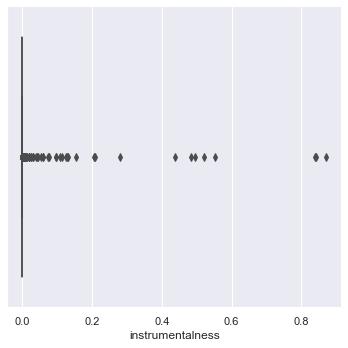

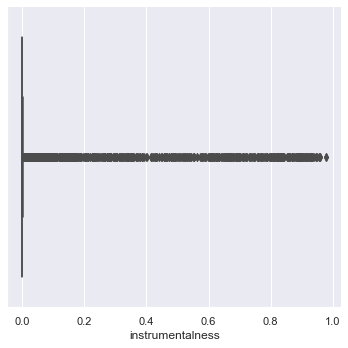

In [18]:
sns.factorplot(x='instrumentalness', data=pop, kind='box')


sns.factorplot(x='instrumentalness', data=nonpop, kind='box')
plt.show()

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


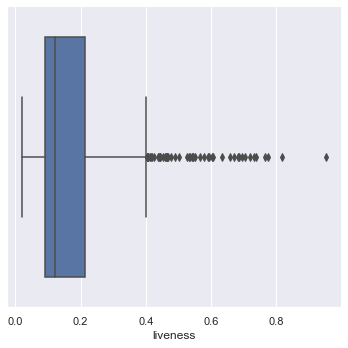

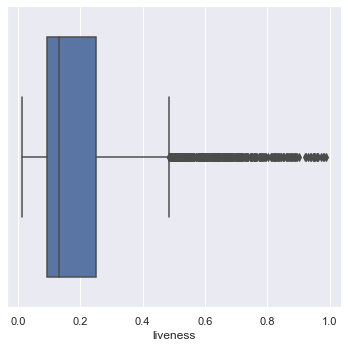

In [19]:
sns.factorplot(x='liveness', data=pop, kind='box')


sns.factorplot(x='liveness', data=nonpop, kind='box')
plt.show()

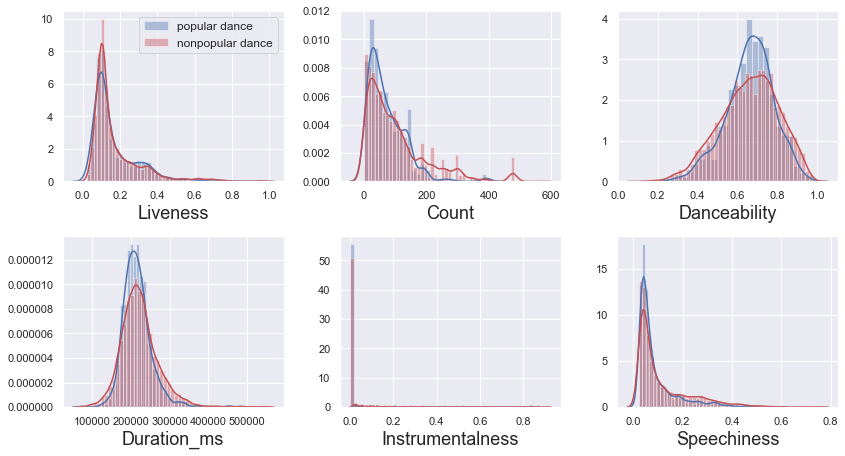

In [20]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Dance')
sns.distplot(allpop.liveness, color='r', label='Other Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(allpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


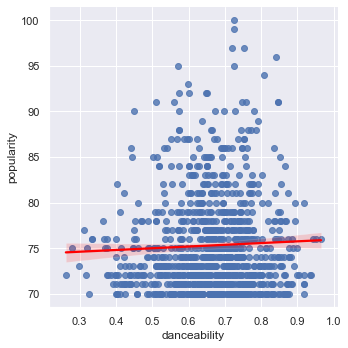

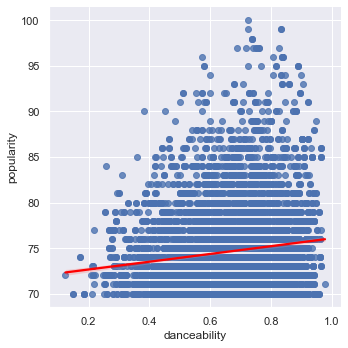

In [23]:
n = sns.lmplot(x='danceability',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)


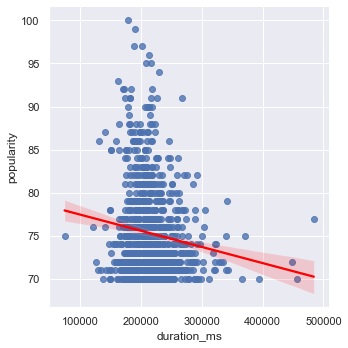

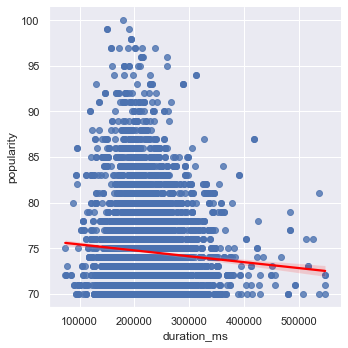

In [24]:
n = sns.lmplot(x='duration_ms',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='duration_ms',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)
